In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Generation

In [2]:
b0, b1, b2 = 2, -5, 11
b = np.array([b0, b1, b2])

In [3]:
train_x = []
train_y = []

data_points = 1000
for _ in range(data_points):
    x = (np.random.rand(3)-0.5)*50
    y = sum([b[i]*x[i] for i in range(len(b))])
    train_x.append(x)
    train_y.append(y)

In [4]:
train_x = np.array(train_x)
train_y = np.array(train_y)

### Training

In [5]:
print (train_x.shape, train_y.shape)

(1000, 3) (1000,)


We need to normalize train_x

In [6]:
minn = np.min(train_x, axis=0)
maxx = np.max(train_x, axis=0)

Stochastic Gradient Descent

In [7]:
def full_gd(x_train, y_train, no_iter, learning_rate):
    b = np.random.rand(3)*10
    loss_ary = []
    for _ in range(no_iter):
        y_hat = np.dot(x_train, b)
        loss = y_hat - y_train
        loss_ary.append(np.linalg.norm(loss))
        changes = np.zeros(len(b))
        for i in range(len(b)):
            for j in range(len(y_train)):
                changes[i] += x_train[j][i] * loss[j]
        changes = changes/len(y_train) # This is important, do not forget it. 
        b = b - learning_rate * changes
    return b, loss_ary   

In [8]:
b, loss_ary = full_gd(train_x, train_y, 100, 0.001)
print (b)

[ 2. -5. 11.]


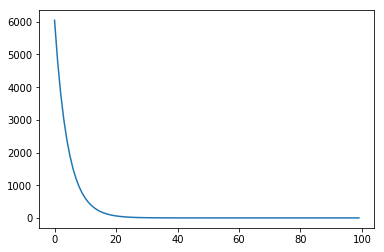

In [9]:
plt.plot(loss_ary)

Learning : We were not able to converge when x = (np.random.rand(3)-0.5) * 50  
Multiplying by 50 was increasing the range  
Gradient descent works well when input is normalized, coefficient changes so drastically otherwise.  
We did not normalize them here because we were interested in coefficient not the prediction. Solution ther was to  reduce learning rate.

In [10]:
def batch_gd(x_train, y_train, no_iter, learning_rate, batch_size):
    b = np.random.rand(3)*10
    loss_ary = []
    for _ in range(no_iter):
        y_hat = np.dot(x_train, b)
        loss = y_hat - y_train
        loss_ary.append(np.linalg.norm(loss))
        for batch_start in range(0, len(y_train), batch_size):
            batch_end = min(batch_start + batch_size, len(y_train))
            x_subset, y_subset = x_train[batch_start:batch_end], y_train[batch_start:batch_end]
            y_hat = np.dot(x_train, b)
            changes = np.zeros(len(b))
            for i in range(len(b)):
                for j in range(len(y_subset)):
                    changes[i] += x_subset[j][i] * loss[j]
            changes = changes/len(y_subset) # This is important, do not forget it. 
            b = b - learning_rate * changes
    return b, loss_ary   

[ 1.99999951 -5.00000022 10.99999968]


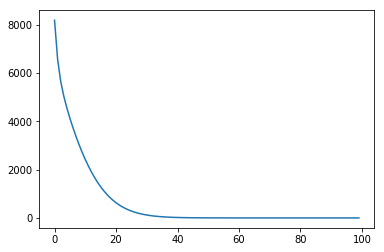

In [11]:
b, loss_ary = batch_gd(train_x, train_y, 100, 0.001, 100)
print (b)
plt.plot(loss_ary)

In [12]:
def stochastic_gd(x_train, y_train, no_iter, learning_rate):
    b = np.random.rand(3)*10
    loss_ary = []
    for _ in range(no_iter):
        y_hat = np.dot(x_train, b)
        loss = y_hat - y_train
        loss_ary.append(np.linalg.norm(loss))
        for j in range(len(y_train)):
            y_hat = np.dot(x_train[j], b)
            loss = y_hat - y_train[j]
            changes = np.zeros(len(b))
            for i in range(len(b)):
                changes[i] = x_train[j][i] * loss
            b = b - learning_rate * changes
    return b, loss_ary   

[nan nan nan]


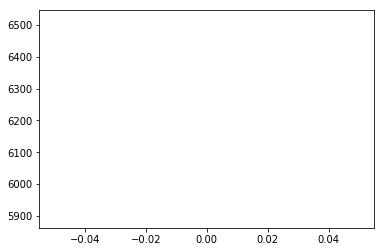

In [14]:
b, loss_ary = stochastic_gd(train_x, train_y, 100, 0.1)
print (b)
plt.plot(loss_ary) #TODO : Need tp debug